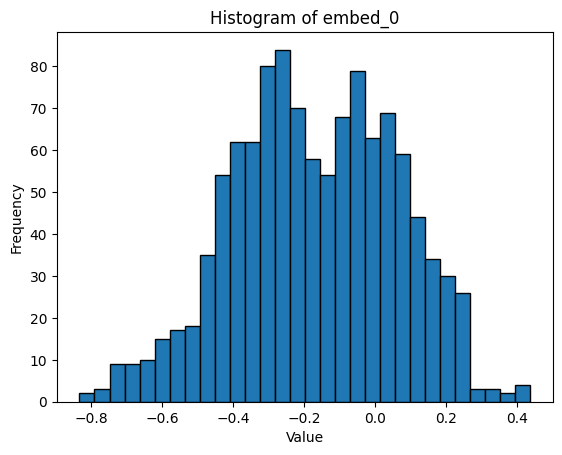

Mean of embed_0: -0.17029445322602035
Variance of embed_0: 0.05343827792925807


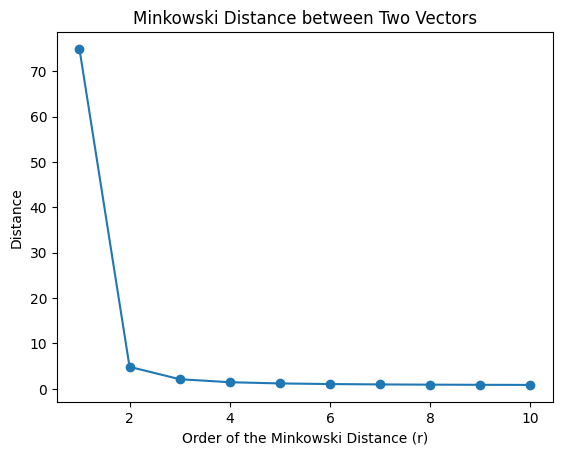

Training set size: 788
Test set size: 338
Accuracy of kNN with k=3: 0.4171597633136095
Predicted classes for the test set:
 [1 4 2 2 4 3 3 1 2 4 4 2 4 2 5 2 3 3 1 2 2 3 3 2 3 2 2 0 1 2 4 4 3 2 3 2 3
 2 2 2 3 2 4 2 5 2 2 5 0 2 1 3 5 1 5 2 2 2 4 2 1 2 2 1 2 2 0 2 2 2 1 0 3 4
 2 2 4 3 3 2 2 4 3 2 3 5 4 4 2 3 2 2 4 2 2 0 3 2 0 3 3 3 2 3 2 5 3 3 3 2 3
 4 5 3 1 1 2 2 4 4 2 2 2 2 2 3 3 1 2 2 2 2 2 0 1 5 2 2 3 2 4 0 4 1 2 2 3 4
 5 3 3 3 3 2 4 4 3 5 5 2 3 1 4 2 3 2 4 4 3 1 0 3 3 2 3 2 2 5 1 5 2 0 1 2 2
 2 2 2 2 3 2 1 3 3 3 2 5 1 4 0 1 2 2 4 0 2 3 2 3 2 3 1 3 4 3 4 5 1 3 2 1 2
 2 0 3 2 3 3 3 4 4 1 3 4 3 5 2 4 2 4 3 4 4 4 2 3 3 2 2 4 4 0 3 5 3 1 2 4 2
 3 2 2 2 4 2 4 4 2 3 3 1 4 1 2 0 3 2 4 2 1 1 2 2 2 2 2 2 2 2 2 4 1 4 3 2 0
 2 3 2 3 4 3 2 4 2 3 2 2 4 3 2 2 4 4 3 4 3 4 4 2 1 0 2 3 2 2 2 4 2 2 2 1 4
 5 2 2 3 2]
Accuracy of kNN with k=1: 0.44970414201183434
Accuracy of kNN with k=3: 0.4171597633136095
Confusion Matrix:
 [[ 2  2  4  1  1  0]
 [11 10  9  4  1  3]
 [ 3  8 62 21 10  4]
 [ 1  8 37 32 14

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

file_path = 'training_mathbert.xlsx'  # Replace with your actual file path
df = pd.read_excel(file_path)

# A2
feature = df['embed_0']

plt.hist(feature, bins=30, edgecolor='black')
plt.title('Histogram of embed_0')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

mean_value = np.mean(feature)
variance_value = np.var(feature)

print(f"Mean of embed_0: {mean_value}")
print(f"Variance of embed_0: {variance_value}")

# A3.
vector_1 = df.iloc[0, :-1]
vector_2 = df.iloc[1, :-1]

r_values = range(1, 11)
distances = [distance.minkowski(vector_1, vector_2, p=r) for r in r_values]

plt.plot(r_values, distances, marker='o')
plt.title('Minkowski Distance between Two Vectors')
plt.xlabel('Order of the Minkowski Distance (r)')
plt.ylabel('Distance')
plt.show()

# A4.
X = df.drop(columns=['output'])
y = df['output'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# A5.
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# A6.
accuracy = knn.score(X_test, y_test)
print(f"Accuracy of kNN with k=3: {accuracy}")

# A7.
y_pred = knn.predict(X_test)
print("Predicted classes for the test set:\n", y_pred)

# A8.
knn_k1 = KNeighborsClassifier(n_neighbors=1)
knn_k1.fit(X_train, y_train)
accuracy_k1 = knn_k1.score(X_test, y_test)
print(f"Accuracy of kNN with k=1: {accuracy_k1}")
print(f"Accuracy of kNN with k=3: {accuracy}")

# A9.
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n",class_report)

In [7]:
import numpy as np
import pandas as pd

file_path = 'training_mathbert.xlsx'
df = pd.read_excel(file_path)

features = df.drop(columns=['output'])
labels = df['output']

centroid_class_0 = np.mean(features[labels == 0], axis=0)
centroid_class_1 = np.mean(features[labels == 1], axis=0)

spread_class_0 = np.std(features[labels == 0], axis=0)
spread_class_1 = np.std(features[labels == 1], axis=0)

distance_between_centroids = np.linalg.norm(centroid_class_0 - centroid_class_1)

print("Centroid for Class 0:\n", centroid_class_0)
print("\nCentroid for Class 1:\n", centroid_class_1)
print("\nSpread (Standard Deviation) for Class 0:\n", spread_class_0)
print("\nSpread (Standard Deviation) for Class 1:\n", spread_class_1)
print("\nDistance between Centroids:\n", distance_between_centroids)

Centroid for Class 0:
 embed_0     -0.153674
embed_1      0.211456
embed_2      0.155295
embed_3      0.093863
embed_4     -0.488665
               ...   
embed_379   -0.165440
embed_380   -0.152975
embed_381   -0.008719
embed_382    0.276078
embed_383   -0.030131
Length: 384, dtype: float64

Centroid for Class 1:
 embed_0     -0.184075
embed_1      0.137983
embed_2      0.104661
embed_3      0.127538
embed_4     -0.408991
               ...   
embed_379   -0.153687
embed_380   -0.141090
embed_381    0.004908
embed_382    0.271903
embed_383   -0.027964
Length: 384, dtype: float64

Spread (Standard Deviation) for Class 0:
 embed_0      0.279062
embed_1      0.084561
embed_2      0.113283
embed_3      0.110330
embed_4      0.141137
               ...   
embed_379    0.170301
embed_380    0.236488
embed_381    0.090589
embed_382    0.221307
embed_383    0.153299
Length: 384, dtype: float64

Spread (Standard Deviation) for Class 1:
 embed_0      0.202695
embed_1      0.166993
embed_2      